# Machine learning 101

### Import librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load random dataset 
made with http://robertgrantstats.co.uk/drawmydata.html

In [2]:
df = pd.read_csv("mydata.csv")

In [3]:
df.head()

,X,Y
0,40.5128,63.5096
1,55.3846,67.3558
2,76.1538,33.1250
3,-5.1282,85.8173
4,17.6923,79.6635


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       37 non-null     float64
 1   Y       37 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


### Let's show the dataset

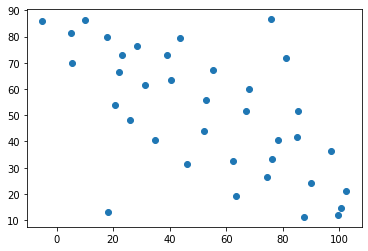

In [5]:
plt.scatter(df.X,df.Y)

### Linear regression
#### Predict x => ax + b

In [6]:
# let's find a 
mu_y = np.mean(df.Y)
mu_x = np.mean(df.X)
x = df.X
y = df.Y

In [7]:
a = np.sum((y - mu_y)*(x - mu_x)) / np.sum((x - mu_x)**2)
a

-0.4720222370793708

In [8]:
b = mu_y - a*mu_x
b

75.98570833216662

### Graphic linear regression and data

y = -0.4720*x+75.9857


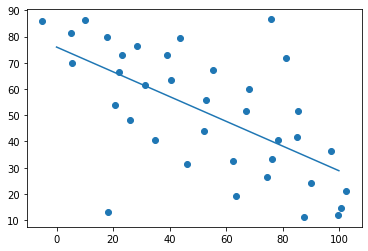

In [9]:
plt.scatter(x,y)
x_test = np.arange(0,100,0.1)
test = lambda x: a*x+b
plt.plot(x_test, test(x_test))
print(f"y = {a:.4f}*x+{b:.4f}")

plt.show()

### Common Error Measurements

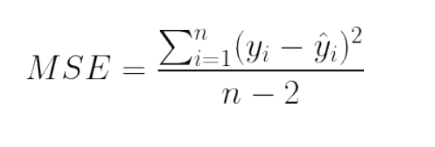
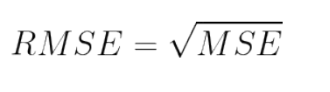

In [10]:
## Erreur quadratiques
n = len(df) # nombre de point de données
MSE = np.sum((y-test(df.X))**2)/(n) # -2 degree de liberté ( a et b sont 2 degrée de liberté)
RMSE = np.sqrt(MSE)

print(f'MSE = {MSE:.3f}')
print(f'RMSE = {RMSE:.3f}')

MSE = 338.387
RMSE = 18.395


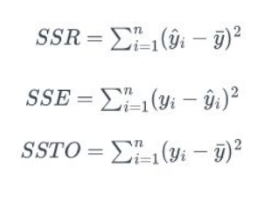
ŷ : the predicted value of y 

In [11]:
SSR = np.sum((test(x)-mu_y)**2)
SSE = np.sum((y-test(x))**2)
SSTO = np.sum((y-mu_y)**2)
print(f"SSR={SSR:.3}")
print(f"SSE={SSE:.3}")
print(f"SSTO={SSR:.3}")

SSR=7.76e+03
SSE=1.25e+04
SSTO=7.76e+03


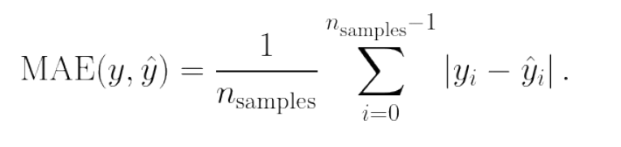

In [12]:
MAE = 1/n * np.sum(np.abs(y-test(x)))
MAE

14.432623087553687

Now using sklearn

In [13]:
# Mean squared error
from sklearn.metrics import mean_squared_error
MSE_skl = mean_squared_error(y,test(x),squared=True)
# Root Mean Squared Error
RMSE_skl = MSE_skl**0.5
print("With sklearn we get : ")
print(f'MSE  = {MSE_skl:.3f}')
print(f'RMSE = {RMSE_skl:.3f}')

With sklearn we get : 
MSE  = 338.387
RMSE = 18.395


### Other methods of linear regession

- Conjugate gradient method
- newton method

### gradient descent

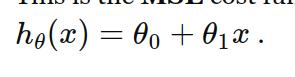

In [14]:
def f(a,b,x): # fonction 
    """
    a: coef directeur
    b: constante
    x : array
    """
    return a*x+b


In [52]:
# loss function chosen MSE because convex
def mse_db(y_data,x_data,a,b):
    # mse function derived with a
    return np.sum((y_data-f(a,b,x_data)))*(-2/(len(x_data)-2))

def mse_da(y_data,x_data,a,b): # ok 
    # mse function derived with a
    return np.sum((y_data-f(a,b,x_data))*(x_data))*(-2/(len(x_data)-2))

In [64]:
def gradient_descent(point,n,x,y,alpha):
    """
    point : random point
    n : number of iterations
    """
    i=0
    a = [point[0]]
    b = [point[1]]
    while i!=n:
        i+=1
        a.append(a[-1]-alpha*mse_da(y,x,a[-1],b[-1]))
        b.append(b[-1]-alpha*mse_db(y,x,a[-2],b[-1]))
    return a[-1],b[-1]

# start at a random point 
point_start = df.sample(1).values.tolist()[0]
a_g , b_g = gradient_descent(point_start,10000,x,y,0.0001)

first method:
y = -0.4720*x+75.9857
gradient method
y = -0.3314*x+66.0331


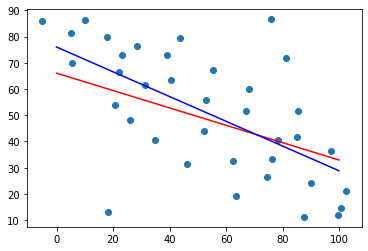

In [68]:
plt.scatter(x,y)
x_test = np.arange(0,100,0.1)
grad = lambda x: a_g*x+b_g
plt.plot(x_test, grad(x_test),color="red")
test = lambda x: a*x+b
plt.plot(x_test, test(x_test),color="blue")
print("first method:")
print(f"y = {a:.4f}*x+{b:.4f}")
print("gradient method")
print(f"y = {a_g:.4f}*x+{b_g:.4f}")
plt.show()